<a href="https://colab.research.google.com/github/navas604/Text-Mining-Image-Recognition/blob/main/LAB1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Universidad Galileo**
## **Maestría en Data Science**
## **Text Mining & Image Recognition**
## **Antonio Everardo Navas Contreras, 14003163**
## **06/08/2021**

---

## **LABORATORIO 1 - ALGORITMO DE CANNY**

---

### CARGAR LIBRERIAS

In [ ]:
# Importar las librerías que se utilizarán

import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

In [ ]:
# Función para escribir la imagen en disco y la lee de vuelta para poderla desplegar

def write_and_show(strImg, arrImg):
  cv2.imwrite(strImg, arrImg)
  imgTemp = cv2.imread(strImg)
  plt.figure(figsize=(10,10))
  plt.imshow(imgTemp, cmap='gray')

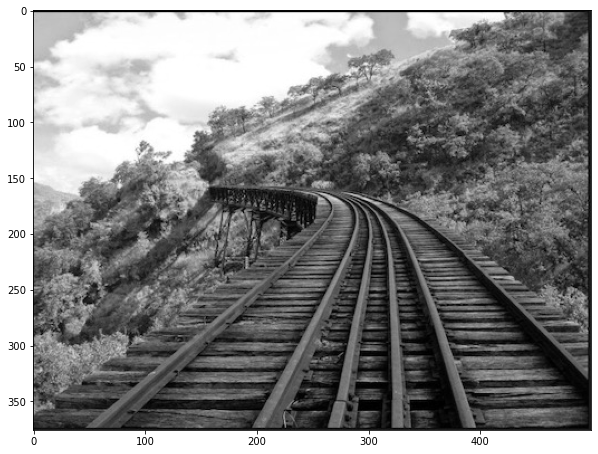

In [ ]:
# Cargar y mostrar imagen

img = cv2.imread('IMG_0084.JPG', cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(10,10))
plt.imshow(img, cmap='gray')

In [ ]:
img.shape

(376, 500)

In [ ]:
# Función para realizar transformaciones de convolución con diferentes Kernels

def convolutional_filter(imagen, kernel):
  alto = imagen.shape[0]
  ancho = imagen.shape[1]
  
  altoKernel = len(kernel[:,0])
  anchoKernel = len(kernel[0,:])
  
  #parte entera del centro del kernel
  step = int(len(kernel[0,:])/2)

  newImg = np.zeros((alto, ancho))#, 1))
  
  for i in range(step, alto - step):
    newPixel = 0
    for j in range(step, ancho - step):
      ventana = imagen[i-step:i+2*step, j-step:j+2*step]
      newPixel = 0
      for m in range(0, altoKernel):
        for n in range(0, anchoKernel):
          newPixel = newPixel + ventana[m, n] * kernel[m, n]
          newImg[i, j] = int(newPixel)

  titles = ['ORIGINAL']
  titles.append('CONVOLVE')
  
  images_list = []
  images_list.append(imagen)
  images_list.append(newImg)

  # Desplegar las 2 imagenes
  plt.figure(figsize=(15,15))
  for i in range(len(images_list)):
    plt.subplot(1, len(images_list), i + 1)
    plt.imshow(images_list[i], cmap='gray')
    plt.title("IMAGE {}".format(titles[i]), fontdict={"fontsize":16})
  plt.show()

  return newImg

In [ ]:
# Kernel Gaussiano

kernel_gaussian = (1 / 16.0) * np.array([[1., 2., 1.],
                                         [2., 4., 2.],
                                         [1., 2., 1.]])

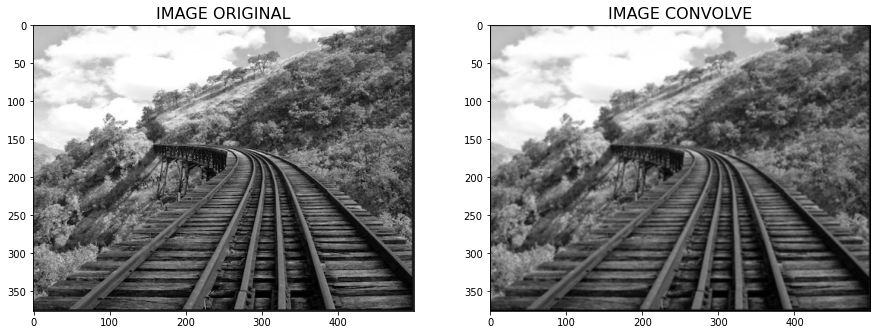

In [ ]:
img_filtered = convolutional_filter(img, kernel_gaussian)

In [ ]:
def derivadaX(img):
  alto = img.shape[0]
  ancho = img.shape[1]

  derivadaX_Output = np.zeros((alto, ancho, 1))

  for i in range(0, alto):
    for j in range(0, ancho - 1):
      derivadaX_Output[i,j] = img[i, j+1] - img[i, j]
  
  return derivadaX_Output

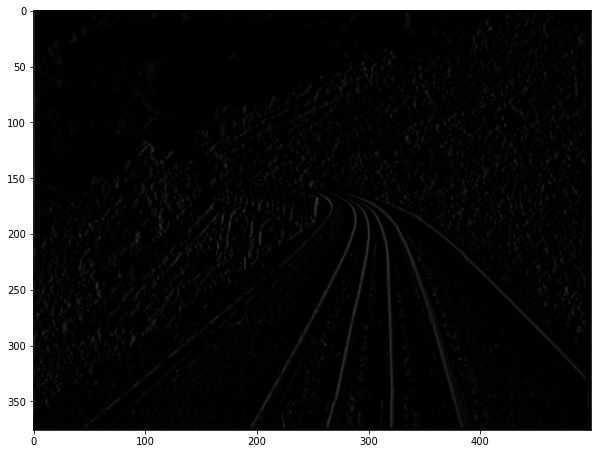

In [ ]:
derX = derivadaX(img_filtered)
write_and_show('DerivadaX.jpg', derX)

In [ ]:
def derivadaY(img):
  alto = img.shape[0]
  ancho = img.shape[1]

  derivadaY_Output = np.zeros((alto, ancho, 1))

  for i in range(0, alto - 1):
    for j in range(0, ancho):
      derivadaY_Output[i,j] = img[i + 1, j] - img[i, j]
  
  return derivadaY_Output

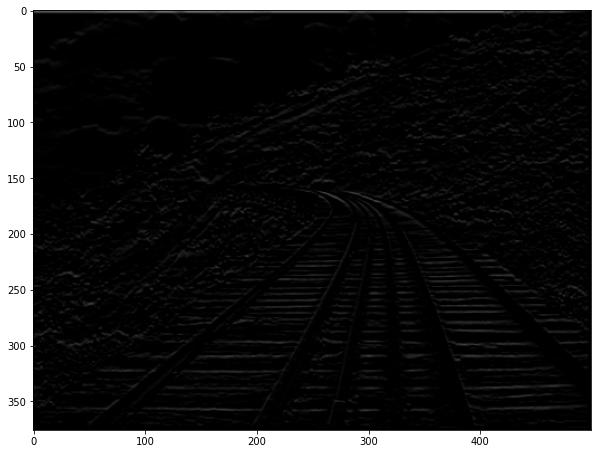

In [ ]:
derY = derivadaY(img_filtered)
write_and_show('DerivadaY.jpg', derY)

In [ ]:
def magnitud(dx, dy):
  alto = dx.shape[0]
  ancho = dx.shape[1]

  mag = np.zeros((alto, ancho, 1))

  for i in range(0, alto):
    for j in range(0, ancho):
      mag[i,j] = math.sqrt(dx[i,j]**2 + dy[i,j]**2)
  
  return mag

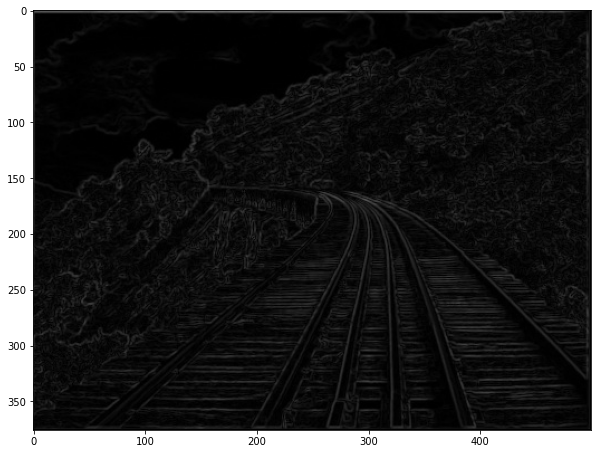

In [ ]:
magnitud_img = magnitud(derX, derY)
write_and_show('Magnitud.jpg', magnitud_img)

In [ ]:
def fase(dx, dy):
  alto = dx.shape[0]
  ancho = dx.shape[1]

  phase = np.zeros((alto, ancho, 1))

  for i in range(0, alto):
    for j in range(0, ancho):
      phase[i,j] = int((180/math.pi) * math.atan2(dy[i,j], dx[i,j]))
  
  return phase

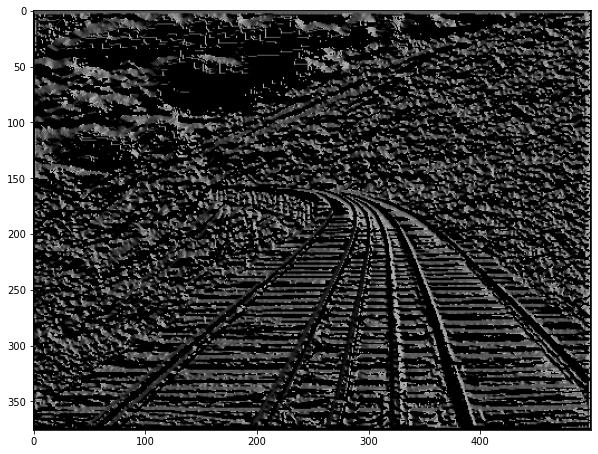

In [ ]:
fase_img = fase(derX, derY)
write_and_show('Fase.jpg', fase_img)

In [ ]:
def non_maximum_suppression(magImage, phaseImage):
  alto = magImage.shape[0]
  ancho =  magImage.shape[1]
  
  newImg = np.zeros((alto, ancho,1))
  val1 = 0
  val2 = 0
  val3 = 0
  alpha = 0.1
  for i in range(1, alto - 2):
    for j in range(1, ancho - 2):
      ventana = magImage[i-1:i+2, j-1:j+2]
      angulo = phaseImage[i, j]
      vDerecha = magImage[i - 1, j]
      vIzquierda = magImage[i + 1, j]
      
      if(((angulo > 337)  or (angulo <= 23)) or ((angulo >= 157) and (angulo <= 203))):
        val1 = ventana[1,0]
        val2 = ventana[1,1]
        val3 = ventana[1,2]
      
      elif(((angulo > 23) and (angulo <= 67)) or ((angulo > 203) and (angulo <= 248))):
        val1 = ventana[0,2]
        val2 = ventana[1,1]
        val3 = ventana[2,0]
      
      elif(((angulo > 67) and (angulo <= 113)) or ((angulo > 248) and (angulo <= 293))):
        val1 = ventana[0,1]
        val2 = ventana[1,1]
        val3 = ventana[2,1]
      
      elif(((angulo > 293) and (angulo <= 337)) or ((angulo > 113) and (angulo <= 157))):
        val1 = ventana[0,0]
        val2 = ventana[1,1]
        val3 = ventana[2,2]
    
      if((val2 >= val1) and (val2 >= val3)):
        newImg[i, j] = val2 
        #newImg[i,j] = alpha*val1 + (1-alpha)*val3
        #newImg[i, j] = 255
      else:
        newImg[i, j] = 0
        
  return newImg

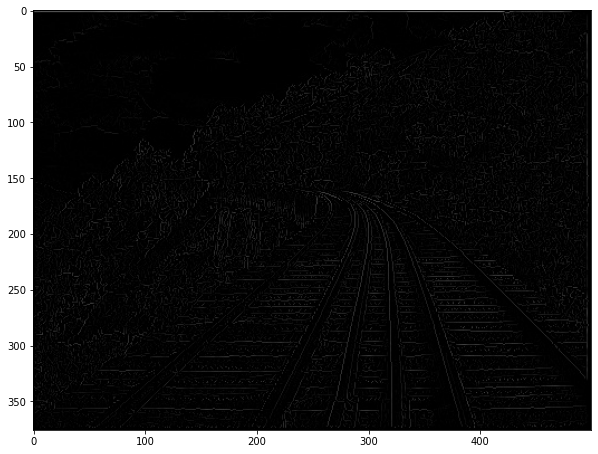

In [ ]:
nms_img = non_maximum_suppression(magnitud_img, fase_img)
write_and_show('NMS.jpg', nms_img)

In [ ]:
def threshold(img):
  alto = img.shape[0]
  ancho = img.shape[1]

  new_img = np.zeros((alto, ancho, 1))

  for i in range(0, alto):
    for j in range(0, ancho):
      if (img[i,j] > 12):
        new_img[i,j] = 255
      else:
        new_img[i,j] = 0
  
  return new_img

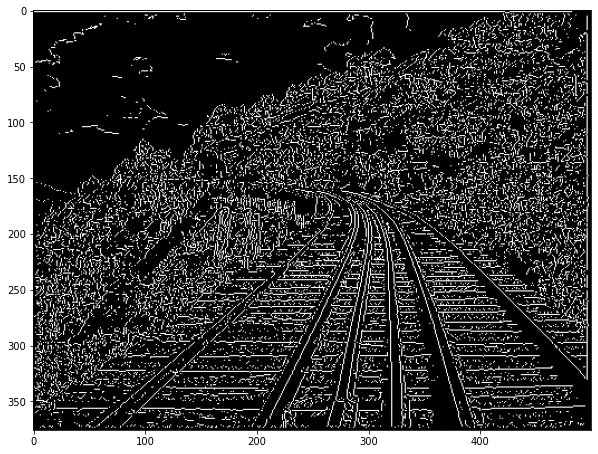

In [ ]:
canny_img = threshold(nms_img)
write_and_show('Canny.jpg', canny_img)

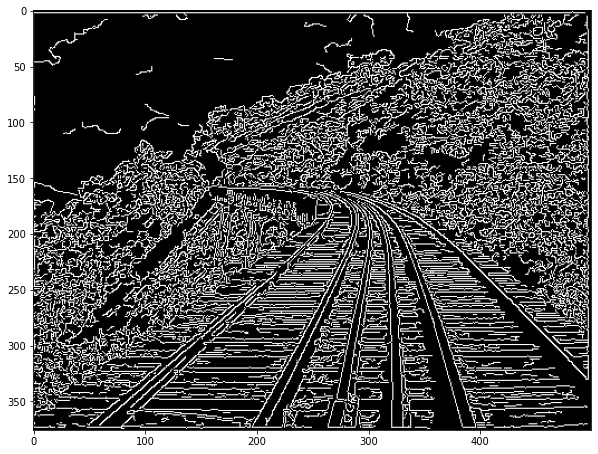

In [ ]:
edges = cv2.Canny(img, 100, 200)
write_and_show('Canny_CV2.jpg', edges)